# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've decided to analyze the The Movie Database as I'm a big fan of cinema. As we already know, profits are more important than revenue, so I want to know which variables are important to make a film profitfull. These are some usefull questions:
>> 1. Which year was the most profitfull? And which gender?
>> 2. Long films are better rated than sort films?
>> 3. Best rated films are more profitfull than less rated one?
>> 5. Who is the best rated director? And the actor/actress who generates more revenue?
>> 6. *Bonus*: Which saga is better: *Star Wars* or *The Lord of The Rings*?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Luckly there's no need to specify the sep parameter and there's a column names' row. Also, I realized that I can use id column as index, so I reload the csv specifying the index col.

In [3]:
df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


General information about the dataframe:

In [4]:
df.shape

(10866, 20)

In [5]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Oh! There must be something wrong... There can't be films with no budget or revenue...
<br>There are also films with no runtime...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [7]:
df.duplicated().sum()

1

Oh! There's a duplicated row...

In [8]:
df.nunique()

imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

Wow! We have films from almost **60 years!!**.

> Some problems I have to fix are:
>> 1. Drop duplicated row.
>> 2. Drop useless columns.
>> 3. Drop rows with missing information.
>> 4. Drop rows with 0 budget or revenue.
>> 5. Fix release_date type.
>> 6. Create profit_adj variable.
>> 7. Save the depurated csv.

### Data Cleaning (Drop duplicated row)

As we saw before, there is a duplicated row. Let's see which row is and drop it.

In [10]:
df[df.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Previously, we saw there was **10866** rows...

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 20)

In [12]:
df.duplicated().sum()

0

Great! It works.

### Data Cleaning (Drop useless columns)

Before dropping rows with missing data, it's a good idea to drop useless columns just to avoid dropping rows with missing information in those columns.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj       

Columns with missing values are:

**imdb_id**: as we already used id as index, we don't really need it.

**cast**: it's necesary.

**homepage**: it's useless, we can drop it.

**director**: it's necesary.

**tagline**: it's useless, we can drop it.

**keywords**: it's useless, we can drop it.

**overview**: it's useless, we can drop it.

**genres**: it's necesary.

**production_companies**: it's useless, we can drop it.

In [14]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 14 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


Now, there are less rows with missing data than before.

### Data Cleaning (Drop rows with missing information)

Now we only have important columns, it's time to drop rows with missing information as we can not calculate the mean or something similar (all the columns with missing values are objects)

In [15]:
df.shape

(10865, 14)

In [16]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 14 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


There are **10731** rows with no missing data.

### Data Cleaning (Fix release_date type)

*release_date* is an object, but is a date, so whe should fix the type.

In [17]:
df['release_date']=pd.to_datetime(df['release_date'])

In [18]:
df[df['release_date']==min(df['release_date'])]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
18118,0.386778,0,0,Mackenna's Gold,Gregory Peck|Omar Sharif|Camilla Sparv|Julie N...,J. Lee Thompson,128,Action|Western,1969-01-01,17,6.2,1969,0.0,0.0


Umm... Something's happening... We saw before that the minimum release year was 1960...

In [19]:
df[df['release_year']==1960].release_date.head()

id
539     2060-08-14
966     2060-10-23
967     2060-10-06
284     2060-06-15
24014   2060-10-07
Name: release_date, dtype: datetime64[ns]

<div class="alert alert-block alert-info">
It seems that <i>pd.to_datetime()</i> don't work with ancient years... Luckily, someone posted in the <i>Udacity Knowledge</i> how to solve it. Thank you Ezra!!
</div>

In [20]:
#https://knowledge.udacity.com/questions/5615
from datetime import timedelta, date 
df['release_date' + '_fix'] = pd.to_datetime(df['release_date'])
future = df['release_date' + '_fix'] > pd.to_datetime(date(year=2018,month=1,day=1))
df.loc[future, 'release_date' + '_fix'] -= timedelta(days=365.25*100)
df[df['release_year']==1960].release_date_fix.head()

id
539     1960-08-14
966     1960-10-23
967     1960-10-06
284     1960-06-15
24014   1960-10-07
Name: release_date_fix, dtype: datetime64[ns]

Perfect! We can now drop release_date and rename the new variable.

In [21]:
df.drop(['release_date'], axis=1, inplace=True)
df.rename(columns={'release_date_fix':'release_date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 14 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
release_date      10731 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.2+ MB


### Data Cleaning (Create profit_adj variable)

As we said before, what really determinate if a film is a success or a failure is the profit. We don't have that variable, but we can calculate easily. As we are going to compare profits among the years, it's better to use the standars variables *budget_adj* and *revenue_adj*.

In [22]:
df['profit_adj']=df['revenue_adj']-df['budget_adj']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date,profit_adj
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2015-06-09,1.254446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2015-05-13,2.101614e+08
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2015-03-18,1.704191e+08
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2015-12-15,1.718723e+09
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2015-04-01,1.210949e+09


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 15 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
release_date      10731 non-null datetime64[ns]
profit_adj        10731 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(4)
memory usage: 1.3+ MB


### Data Cleaning (Save the depurated csv)

Finally, it's time to save the depurated csv.

As we are using an original column as index, we specify index=True to keep that column.

In [81]:
df.to_csv('tmdb-movies_edited.csv', index=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Which year was the most profitfull? And which gender?

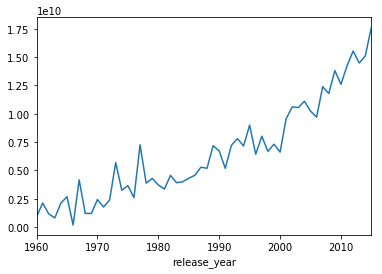

In [24]:
df.groupby('release_year').sum().profit_adj.plot();

It's seems that there is a upward trend through the years, but it could be caused because the amount of films released per year...

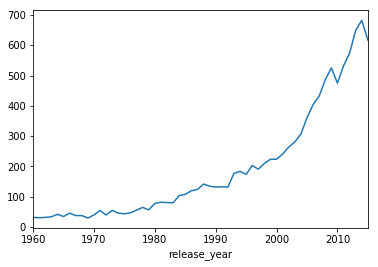

In [25]:
df.groupby('release_year').count().profit_adj.plot();

Just what I thought!. Let's try the same analisis with the average profit instead of the sum.

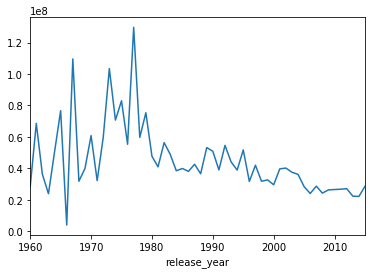

In [83]:
df.groupby('release_year').mean().profit_adj.plot();

In [26]:
df.groupby('release_year').mean().profit_adj

release_year
1960    2.832787e+07
1961    6.861480e+07
1962    3.623546e+07
1963    2.388893e+07
1964    5.046705e+07
1965    7.669502e+07
1966    3.969746e+06
1967    1.096082e+08
1968    3.180575e+07
1969    3.999063e+07
1970    6.083370e+07
1971    3.220480e+07
1972    5.976551e+07
1973    1.034728e+08
1974    7.071519e+07
1975    8.298967e+07
1976    5.534404e+07
1977    1.297131e+08
1978    5.969460e+07
1979    7.537640e+07
1980    4.770202e+07
1981    4.096954e+07
1982    5.636968e+07
1983    4.894267e+07
1984    3.847529e+07
1985    3.992488e+07
1986    3.810119e+07
1987    4.260125e+07
1988    3.656765e+07
1989    5.322906e+07
1990    5.089185e+07
1991    3.900848e+07
1992    5.463087e+07
1993    4.413726e+07
1994    3.890628e+07
1995    5.173239e+07
1996    3.166989e+07
1997    4.199198e+07
1998    3.180858e+07
1999    3.267067e+07
2000    2.954305e+07
2001    3.969449e+07
2002    4.018814e+07
2003    3.753639e+07
2004    3.618822e+07
2005    2.837355e+07
2006    2.402123e+07


1977 was the most profitfull year! Let's see the movies from that year:

In [38]:
df[df['release_year']==1977].sort_values(['profit_adj'], axis=0, 
                 ascending=False) 


,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date,profit_adj
id,,,,,,,,,,,,,,,
11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,1977-03-20,2.750137e+09
840,1.104816,20000000,303788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,600,7.0,1977,7.195562e+07,1.092965e+09,1977-11-16,1.021009e+09
11009,0.602862,3500000,237113184,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118,Drama|Music,192,6.3,1977,1.259223e+07,8.530813e+08,1977-12-16,8.404891e+08
691,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,Lewis Gilbert,125,Adventure|Action|Thriller,279,6.2,1977,5.036893e+07,6.671677e+08,1977-07-07,6.167988e+08
11006,0.541642,0,126737428,Smokey and the Bandit,Burt Reynolds|Sally Field|Jerry Reed|Jackie Gl...,Hal Needham,96,Action|Adventure|Comedy,93,6.9,1977,0.000000e+00,4.559735e+08,1977-05-26,4.559735e+08
14741,0.140163,0,102000000,The Goodbye Girl,Richard Dreyfuss|Marsha Mason|Quinn Cummings|P...,Herbert Ross,111,Comedy|Romance,10,6.5,1977,0.000000e+00,3.669737e+08,1977-11-30,3.669737e+08
11319,1.719385,1200000,71215869,The Rescuers,Bob Newhart|Eva Gabor|Geraldine Page|Joe Flynn...,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy|Family|Animation|Adventure,332,6.6,1977,4.317337e+06,2.562191e+08,1977-06-22,2.519018e+08
24032,0.078067,0,41687243,"Oh, God!",John Denver|George Burns|Teri Garr|Donald Plea...,Carl Reiner,98,Fantasy|Comedy,15,5.6,1977,0.000000e+00,1.499816e+08,1977-10-07,1.499816e+08
703,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,Comedy|Drama|Romance,493,7.6,1977,1.439112e+07,1.376203e+08,1977-04-19,1.232291e+08


In [36]:
new=df['genres'].str.split("|", n = 5, expand = True) 
new=new.iloc[:,0]
new.value_counts()

Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: 0, dtype: int64

Let's analize the top 5 genres:

In [30]:
drama=df[df['genres'].str.contains('Drama')]
gen = np.repeat('Drama', drama.shape[0])
drama.loc[:,'genres'] = gen

In [29]:
comedy=df[df['genres'].str.contains('Comedy')]
gen = np.repeat('Comedy', comedy.shape[0])
comedy.loc[:,'genres'] = gen

In [31]:
action=df[df['genres'].str.contains('Action')]
gen = np.repeat('Action', action.shape[0])
action.loc[:,'genres'] = gen

In [32]:
horror=df[df['genres'].str.contains('Horror')]
gen = np.repeat('Horror', horror.shape[0])
horror.loc[:,'genres'] = gen

In [33]:
adventure=df[df['genres'].str.contains('Adventure')]
gen = np.repeat('Adventure', adventure.shape[0])
adventure.loc[:,'genres'] = gen

In [34]:
genres=drama.append(comedy).append(action).append(horror).append(adventure)
genres.genres.value_counts()

Drama        4746
Comedy       3775
Action       2376
Horror       1636
Adventure    1465
Name: genres, dtype: int64

In [35]:
genres.groupby('genres').mean().profit_adj

genres
Action       5.899614e+07
Adventure    9.813818e+07
Comedy       3.212861e+07
Drama        2.563976e+07
Horror       1.632784e+07
Name: profit_adj, dtype: float64

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!